# K-Means Clustering - Methods using Scikit-learn in Python - Tutorial 23 in Jupyter Notebook

Tutorial made from 'K-Means Clustering - Methods using Scikit-learn in Python - Tutorial 23 in Jupyter Notebook' (TheEngineeringWorld) by Marcus Mariano

Link -> https://www.youtube.com/watch?v=ikt0sny_ImY

## K-Means method

In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report


In [6]:
iris = datasets.load_iris()

In [11]:
# Divides variable in X and y sets.
X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names


In [13]:
X[0:10,]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

## Building and running your model

In [15]:
# Create instance of K Means Clustering and define number or clusters
clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [22]:
# K Means labels
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Plotting your model outputs

In [24]:
# Exemple of ggplot style sheet on Matplotlib
plt.style.use('ggplot')

In [17]:
iris_df = pd.DataFrame(iris.data)

iris_df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

y.columns = ['Targets']

Text(0.5,1,'K-Means Classification')

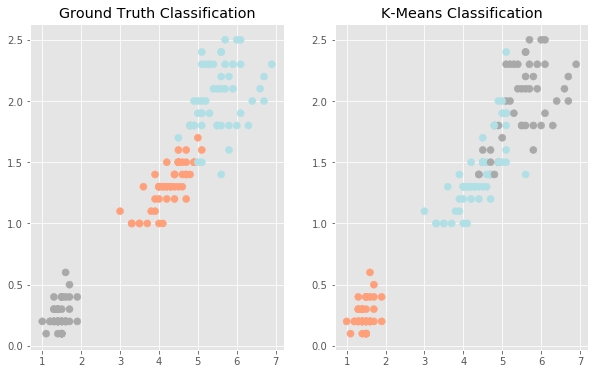

In [29]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplots(1, 2, sharey=True,figsize=(10,6))

plt.subplot(1, 2, 1)
plt.scatter(x=iris_df['Petal Length'], y=iris_df['Petal Width'], c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1, 2, 2)
plt.scatter(x=iris_df['Petal Length'], y=iris_df['Petal Width'], c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

In [32]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

In [35]:
relabel

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

Text(0.5,1,'K-Means Classification')

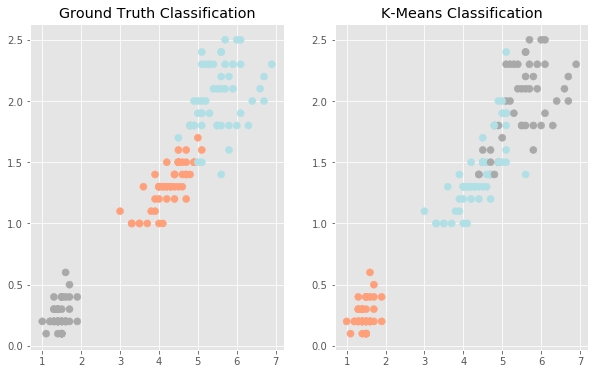

In [33]:
plt.subplots(1, 2, sharey=True,figsize=(10,6))

plt.subplot(1, 2, 1)
plt.scatter(x=iris_df['Petal Length'], y=iris_df['Petal Width'], c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1, 2, 2)
plt.scatter(x=iris_df['Petal Length'], y=iris_df['Petal Width'], c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

## Evaluate your clustering results

In [34]:
# Classification Report
print(classification_report(y, relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150

